In [1]:
import numpy as np
import ceo
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
N_SIDE_LENSLET=90
n = N_SIDE_LENSLET*32
gmt = ceo.GMT_MX()

In [4]:
src = ceo.Source('V',zenith=0,azimuth=0,
                rays_box_size=25.5,
                rays_box_sampling=n,
                rays_origin=[0,0,25])
src>>(gmt,)
+src
src.wavefront.rms(-9)

array([0.75930273])

In [6]:
pym = ceo.Pyramid(N_SIDE_LENSLET,n,modulation=3.0)
src>>(gmt,pym)

(@CEO)>Pyramid: Set modulation sampling to 38


In [9]:
pym.modulation_sampling = 64

In [10]:
%%time
+src

CPU times: user 325 ms, sys: 140 ms, total: 465 ms
Wall time: 464 ms


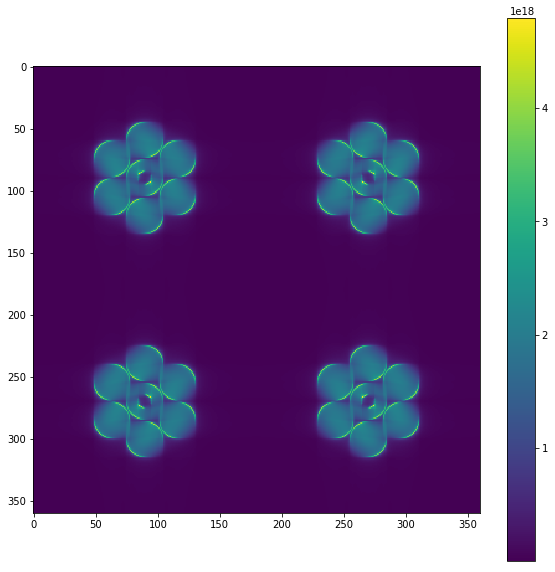

In [11]:
fig = plt.figure()
fig.set_size_inches(10,10)
plt.imshow(pym.camera.frame.host())
plt.colorbar()

In [10]:
src.rays.rot_angle = np.pi/12
pym.camera.reset()
+src

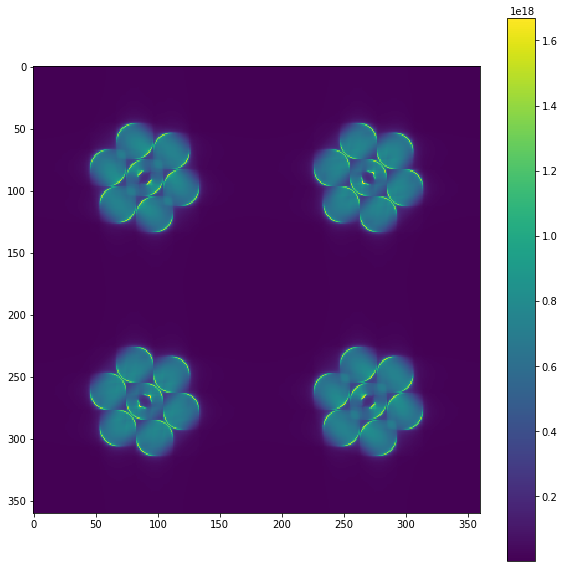

In [13]:
fig = plt.figure()
fig.set_size_inches(10,10)
plt.imshow(pym.camera.frame.host())
plt.colorbar()